# Plot Setting

In [1]:
import os
import sys
from pathlib import Path

# Set root and data directories
ROOT_DIR = Path(os.getcwd()).resolve().parent.parent
sys.path.insert(0, str(ROOT_DIR))
from path import DATA_DIR
from utils import sample_based_pcc

print("ROOT_DIR:", ROOT_DIR)
print("DATA_DIR:", DATA_DIR)


ROOT_DIR: /root/project/reproducity
DATA_DIR: /data/sequential_data


In [2]:
import pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configure Matplotlib styles

mpl.rcParams.update({
    "axes.labelsize": 7,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "legend.frameon": False,
    "legend.fontsize": 3,
    "axes.linewidth": 0.5,
    "pdf.fonttype": 42,
    "figure.dpi": 300,
})


# Figure2A

In [3]:
random_pcc = []
compound_pcc = []
ccl_pcc = []

for data_prefix in ["random_predict", "chemical_blind", "cell_blind"]:
    for split_index in range(10):
        output_file = DATA_DIR / f"result_2025/state_transition_model/default_model/state_transition_original_pcc_{data_prefix}_{split_index}.csv"
        data = pd.read_csv(output_file, index_col=0)
        pcc_value = data["pcc"].mean()
        if data_prefix == "random_predict":
            random_pcc.append(pcc_value)
        if data_prefix == "chemical_blind":
            compound_pcc.append(pcc_value)
        if data_prefix == "cell_blind":
            ccl_pcc.append(pcc_value)

/tmp/ipykernel_1174715/1648294392.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([random_pcc, compound_pcc, ccl_pcc], labels=["Random\nsplitting", "Zero shot of\ncompounds", "Zero shot of\ncell"], widths=[0.45, 0.45, 0.45],


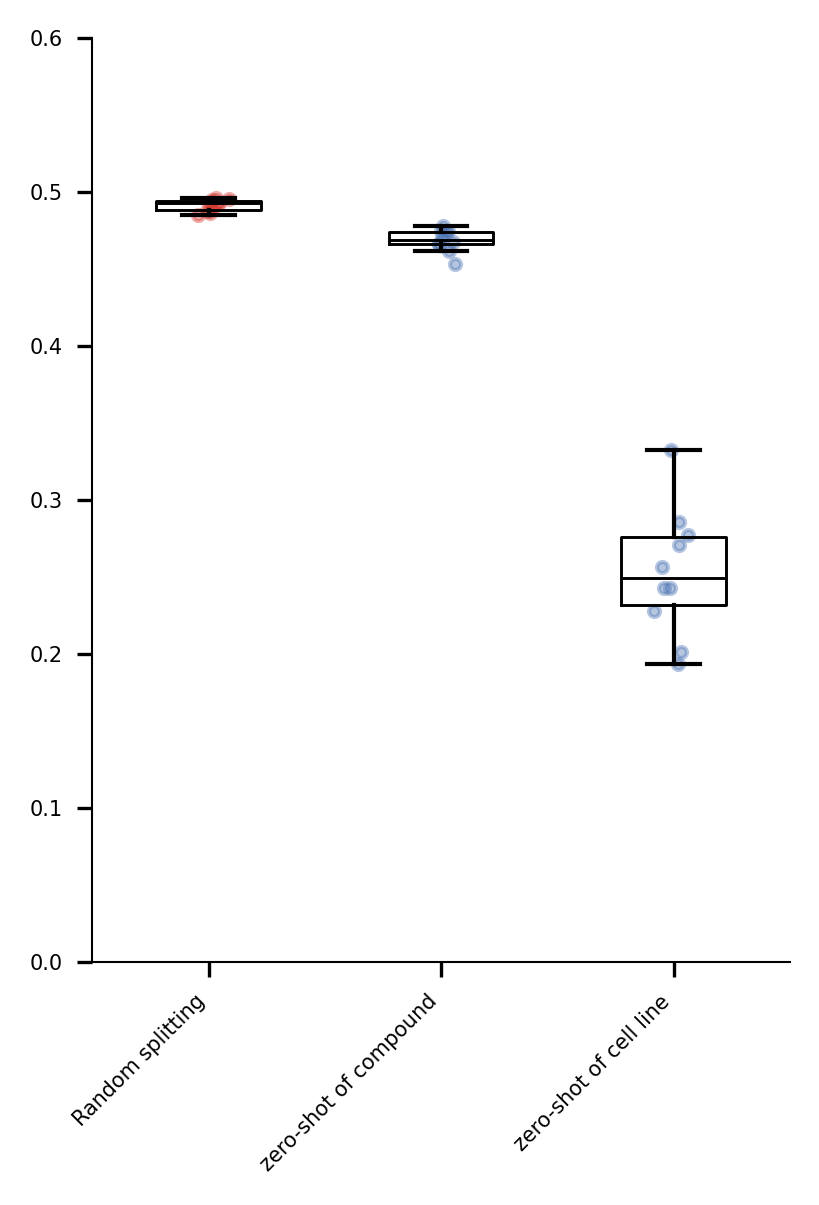

In [4]:
xs = np.concatenate([np.random.normal(1, 0.04, len(random_pcc)), np.random.normal(2, 0.04, len(compound_pcc)), np.random.normal(3, 0.04, len(ccl_pcc))])  # adds jitter to the data points - can be adjusted

boxprops = dict(linestyle='-', linewidth=0.7, color='black')
whiskerprops = dict(color='black')
capprops = dict(color='black')
medianprops = dict(linewidth=0.7, linestyle='-', color='black')

fig, ax = plt.subplots(figsize=(3, 4))


ax.boxplot([random_pcc, compound_pcc, ccl_pcc], labels=["Random\nsplitting", "Zero shot of\ncompounds", "Zero shot of\ncell"], widths=[0.45, 0.45, 0.45],
           notch=False, boxprops=boxprops, whiskerprops=whiskerprops,capprops=capprops, medianprops=medianprops,showmeans=False, showfliers=False)
ax.scatter(xs[0:len(random_pcc)], random_pcc, alpha=0.4, color="#D2352C", s=7)
ax.scatter(xs[len(random_pcc):len(random_pcc)+len(compound_pcc)], compound_pcc, alpha=0.4, color="#4971B2", s=7)
ax.scatter(xs[len(random_pcc)+len(compound_pcc) : ], ccl_pcc, alpha=0.4, color="#4971B2", s=7)
ax.set_ylim(0.0, 0.6)

ax.set_xticklabels(["Random splitting", "zero-shot of compound", "zero-shot of cell line"],rotation=45,ha ='right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


# Figure2B

In [5]:
data_file = DATA_DIR / f"result_2025/state_transition_model/default_model/state_transition_precision_pcc_random_predict_0.csv"
plot_df = pd.read_csv(data_file, index_col=0)
plot_df

,pcc,label
0,-0.013657,1
1,-0.027448,1
2,0.039857,1
3,0.085923,1
4,0.035348,1
...,...,...
159325,0.918905,10
159326,0.820704,10
159327,0.710700,10
159328,0.653167,10


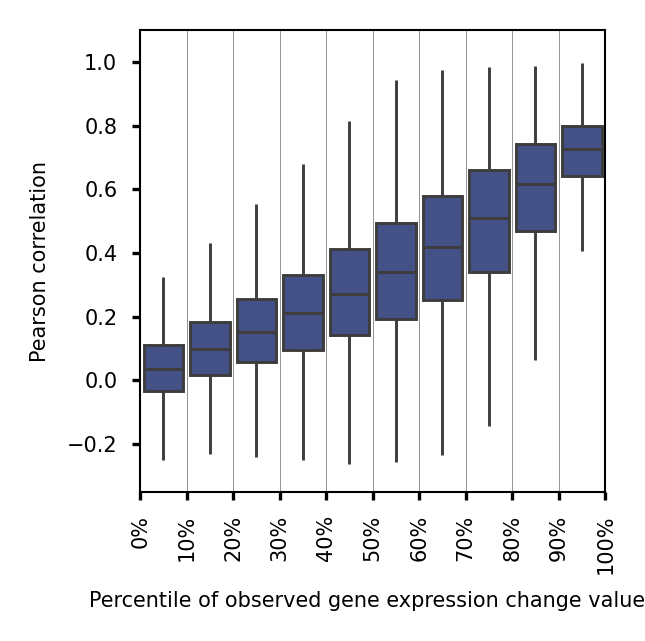

In [6]:
fig,ax =plt.subplots(figsize=(2,2))

ax.vlines(np.arange(0,11)-0.5, -3, 3, colors='grey', linewidth=0.2)
sns.boxplot(x="label", y="pcc", data=plot_df, ax=ax, width=0.85, fliersize=0, linewidth=0.7, color="#394A92", showcaps=False) 


ax.set_xticks(np.arange(0,11)-0.5)
ax.set_xticklabels([str(i*10)+"%" for i in np.arange(0,11)], rotation=90)
# ax.set_xticklabels(list(inset_data["CCL"]), fontsize=5, horizontalalignment='right')  

ax.set_xlabel('Percentile of observed gene expression change values', fontsize=5)
ax.set_ylabel('Pearson correlation', fontsize=5)

ax.tick_params(axis='x', direction='out', length=2)  
ax.tick_params(axis='y', direction='out', length=2) 

ax.set_ylim(-0.35, 1.1)
# plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()

# Figure2C

In [3]:
chemCPA_random_split_path = DATA_DIR / f"result_2025/Benchmark/chemCPA/performance_result_random_split.pkl"
chemCPA_cell_blind_path = DATA_DIR / f"result_2025/Benchmark/chemCPA/performance_result_cell_blind.pkl"
chemCPA_chemical_blind_path = DATA_DIR / f"result_2025/Benchmark/chemCPA/performance_result_chemical_blind.pkl"

alphaTherapy_path = DATA_DIR / f"result_2025/Benchmark/state_transition_model/performance.pkl"

scgen_cell_blind_path = DATA_DIR / f"result_2025/Benchmark/scGen/scgen.pkl"

with open(chemCPA_random_split_path, "rb") as f:
    chemCPA_random_split_r2_scores, chemCPA_random_split_pcc_scores, chemCPA_random_split_rmse_scores = pickle.load(f)

with open(chemCPA_cell_blind_path, "rb") as f:
    chemCPA_cell_blind_r2_scores, chemCPA_cell_blind_pcc_scores, chemCPA_cell_blind_rmse_scores = pickle.load(f)

with open(chemCPA_chemical_blind_path, "rb") as f:
    chemCPA_chemical_blind_r2_scores, chemCPA_chemical_blind_pcc_scores, chemCPA_chemical_blind_rmse_scores = pickle.load(f)

with open(alphaTherapy_path, "rb") as f:
    alphaTherapy_random_split_r2_scores, alphaTherapy_random_split_pcc_scores, alphaTherapy_random_split_rmse_scores, alphaTherapy_cell_blind_r2_scores, alphaTherapy_cell_blind_pcc_scores, alphaTherapy_cell_blind_rmse_scores, alphaTherapy_chemical_blind_r2_scores, alphaTherapy_chemical_blind_pcc_scores, alphaTherapy_chemical_blind_rmse_scores = pickle.load(f)

with open(scgen_cell_blind_path, "rb") as f:
    scGen_cell_blind_r2_scores, scGen_cell_blind_pcc_scores, scGen_cell_blind_rmse_scores = pickle.load(f)


In [4]:
models = ["chemCPA", "alphaTherapy", "scGen"]
scenarios = ["random_split", "chemical_blind", "cell_blind"]
metrics = ["R²", "PCC", "RMSE"]

data_dict = {
    "R²": {
        "random_split": [chemCPA_random_split_r2_scores, alphaTherapy_random_split_r2_scores, None],
        "cell_blind": [chemCPA_cell_blind_r2_scores, alphaTherapy_cell_blind_r2_scores, scGen_cell_blind_r2_scores],
        "chemical_blind": [chemCPA_chemical_blind_r2_scores, alphaTherapy_chemical_blind_r2_scores, None],
    },
    "PCC": {
        "random_split": [chemCPA_random_split_pcc_scores, alphaTherapy_random_split_pcc_scores, None],
        "cell_blind": [chemCPA_cell_blind_pcc_scores, alphaTherapy_cell_blind_pcc_scores, scGen_cell_blind_pcc_scores],
        "chemical_blind": [chemCPA_chemical_blind_pcc_scores, alphaTherapy_chemical_blind_pcc_scores, None],
    },
    "RMSE": {
        "random_split": [chemCPA_random_split_rmse_scores, alphaTherapy_random_split_rmse_scores, None],
        "cell_blind": [chemCPA_cell_blind_rmse_scores, alphaTherapy_cell_blind_rmse_scores, scGen_cell_blind_rmse_scores],
        "chemical_blind": [chemCPA_chemical_blind_rmse_scores, alphaTherapy_chemical_blind_rmse_scores, None],
    },
}

In [5]:
def bootstrap_confidence_interval(data, num_bootstrap=1000, confidence_level=0.95):

    bootstrap_samples = np.random.choice(data, (num_bootstrap, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    lower = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower, upper



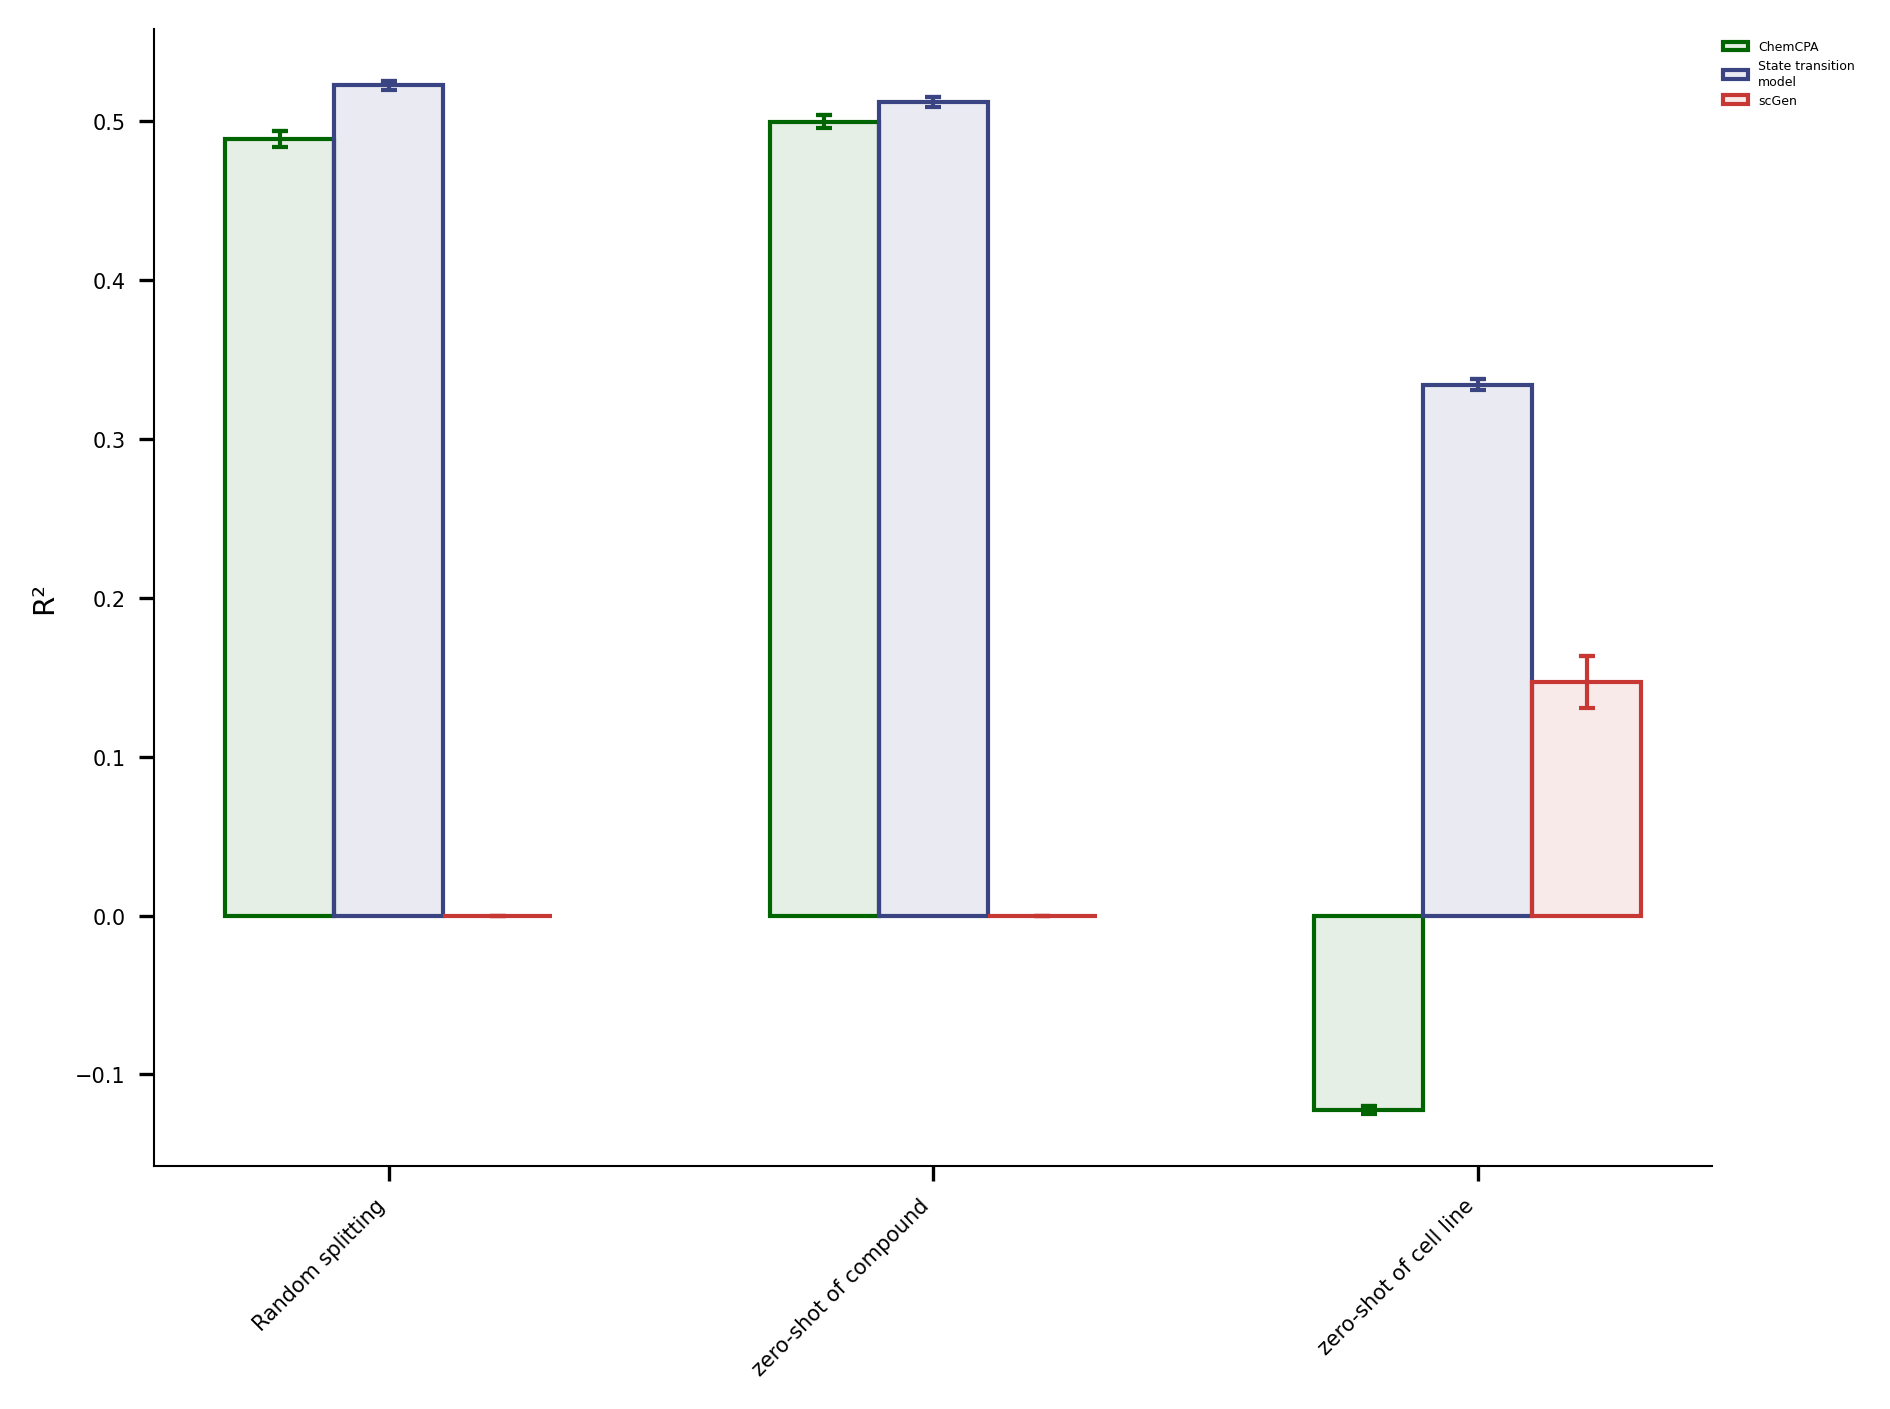

In [6]:
fig, ax = plt.subplots() 
metric = metrics[0]

x_pos = np.arange(len(scenarios))
bar_width = 0.2 

colors = ["#006400", '#3A4482', '#C73834']

for i, model in enumerate(models):
    means = []
    errors = []
    for scenario in scenarios:
        if data_dict[metric][scenario][i] is not None:
            scores = data_dict[metric][scenario][i]
            mean_score = np.mean(scores)
            lower, upper = bootstrap_confidence_interval(scores)
            ci = (upper - lower) / 2 
            means.append(mean_score)
            errors.append(ci)
        else:
            means.append(0) 
            errors.append(0)
    
    bars = ax.bar(
        x_pos + i * bar_width, 
        means, 
        width=bar_width, 
        capsize=1,           
        edgecolor=colors[i],
        color=colors[i],
        linewidth=1,
        label=["ChemCPA", "State transition\nmodel", "scGen"][i],
    )

    for x, (mean, error) in enumerate(zip(means, errors)):
        ax.errorbar(
            x + i * bar_width, mean, yerr=[[error], [error]], fmt=' ', 
            elinewidth=1, color=colors[i], capsize=2
        )
        
        cap_width = 0.01 
        ax.plot(
            [x + i * bar_width - cap_width, x + i * bar_width + cap_width], 
            [mean + error, mean + error], 
            color=colors[i], linewidth=1
        )

    for patch in bars:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.1))
    

ax.set_xticks(x_pos + bar_width * (len(models) - 1) / 2) 
ax.set_xticklabels(["Random splitting", "zero-shot of compound", "zero-shot of cell line"],rotation=45,ha ='right')
ax.set_ylabel(metric)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1), 
    ncol=1  
)

plt.tight_layout()
plt.show()


# Figure2D, E

In [27]:
from collections import Counter

In [31]:
# Load prediction results
pred_file = DATA_DIR / "working_log_2025/state_transition_model/default_model/random_predict_0.pkl"
with open(pred_file, "rb") as f:
    y_true, y_pred = pickle.load(f)

# Load cell line/ drug information for test data
# save when preprocessing data
test_info_file = DATA_DIR / "preprocessed_data_2025/state_transition_model_input_data/step2_model_testset_info_random_split_0.pkl"
with open(test_info_file, "rb") as f:
    test_drug_names, test_ccl = pickle.load(f)

# Load perturbation information
pert_info = pd.read_table(DATA_DIR/ "raw_data/LINCS_GSE92742/GSE92742_Broad_LINCS_pert_info.txt",
                          sep="\t",
                          header=0,
                          index_col=None)

# Merge test data with perturbation information
test_info = pd.DataFrame({"ind": np.arange(len(test_drug_names)), "names": test_drug_names})
test_info = pd.merge(test_info, pert_info, left_on="names", right_on="pert_iname", how="left")
test_info = test_info.loc[:, ['ind', 'names', 'pert_id']]

# Load PCL information and create a dictionary for PCL mapping
PCL_info = pd.read_excel(DATA_DIR/ "raw_data/LINCS_GSE92742/mmc1.xlsx", sheet_name="Table S7 PCL Statistics")
PCL_info = PCL_info.iloc[1:, :]
PCL_info = PCL_info.loc[PCL_info["Type"]=="CP", :]

PCL_dict = {}
for i in range(PCL_info.shape[0]):
    for p in PCL_info.iloc[i, :].loc["Perturbagen IDs"].split("|"):
        PCL_dict[p] = PCL_info.iloc[i, :].loc["PCL Name"]

# Add PCL information to test data
test_info["PCL"] = test_info["pert_id"].map(PCL_dict).fillna("null")
test_info = test_info.loc[test_info["PCL"] != "null", :]
test_info

,ind,names,pert_id,PCL
1,0,trichostatin-a,BRD-K68202742,HDAC inhibitor
2,1,picotamide,BRD-K67277431,Thromboxane receptor antagonist
5,4,rosuvastatin,BRD-K82941592,HMGCR inhibitor
9,8,mitoxantrone,BRD-K21680192,Topoisomerase inhibitor
15,14,wortmannin,BRD-A11678676,PI3K inhibitor
...,...,...,...,...
20051,15892,lestaurtinib,BRD-K23192422,JAK inhibitor
20061,15900,dienestrol,BRD-K95309561,Estrogen receptor agonist
20070,15907,norgestimate,BRD-A04756508,Progesterone receptor agonist
20098,15924,sirolimus,BRD-K89626439,MTOR inhibitor


In [32]:
# Sort PCL information by frequency
PCL_arr = np.array(sorted(dict(Counter(test_info["PCL"])).items(), key=lambda item: -item[1]))

# Calculate PCC by PCL
PCC_by_PCL = []
for PCL_member in PCL_arr[:, 0]:
    temp = np.in1d(test_info["PCL"], PCL_member)
    ind = test_info.loc[temp, "ind"].values
    y_actual = y_true[ind]
    y_predicted = y_pred[ind]
    arr1, _ = sample_based_pcc(y_actual, y_predicted, 10, 20)
    PCC_by_PCL.append(np.mean(arr1))

# Store results in a DataFrame and sort by PCC
PCL_res = pd.DataFrame(PCL_arr)
PCL_res["pcc"] = PCC_by_PCL
PCL_res.columns = ["PCL member", "sample_number", "PCC"]
PCL_res = PCL_res.sort_values("PCC", ascending=False)
PCL_res["sample_number"] = PCL_res["sample_number"].astype(int)

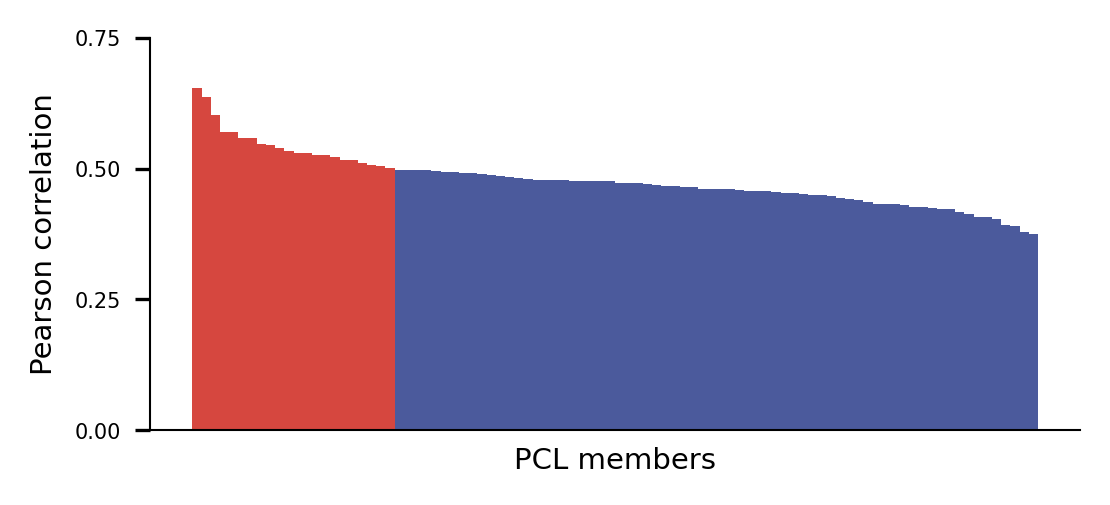

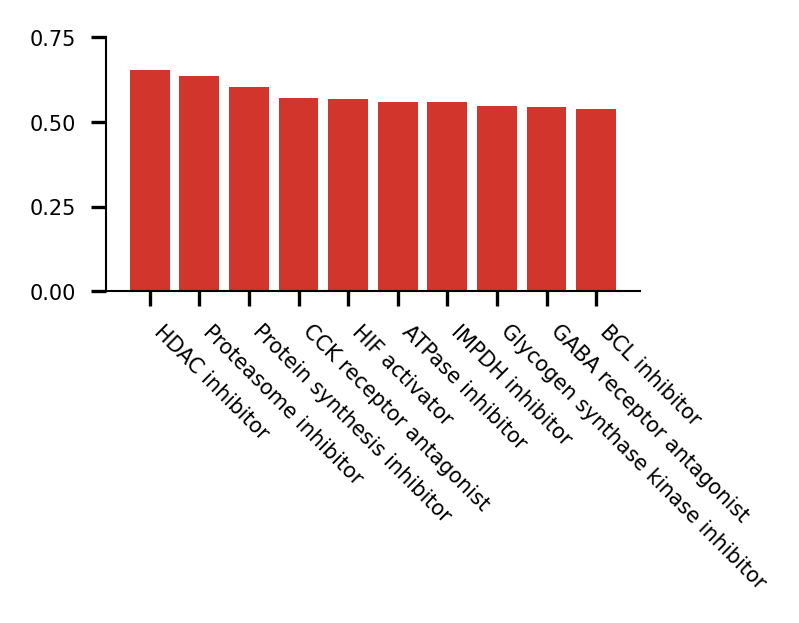

In [33]:
# Plot results: PCL member vs. PCC
colors = ["#D2352C"] * np.sum(PCL_res["PCC"] > 0.5) + ["#394A92"] * np.sum(PCL_res["PCC"] < 0.5)
fig, ax = plt.subplots(figsize=(4, 1.7))
ax.bar(PCL_res["PCL member"], PCL_res["PCC"], width=1.0, align='edge', color=colors, alpha=0.91)
ax.set_xlabel('PCL members', fontsize=7)
ax.set_ylabel('Pearson correlation', fontsize=7)
ax.set_xticks([])
ax.set_yticks(np.arange(0.0, 0.8, 0.25))
ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75'], fontsize=5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Inset plot with top 10 PCL members
inset_data = PCL_res.iloc[0:10, :]
fig, ax = plt.subplots(figsize=(2.3, 1.1))
ax.bar(inset_data["PCL member"], inset_data["PCC"], width=0.8, align='edge', color='#D2352C')
ax.set_xticks(np.arange(inset_data.shape[0]) + 0.4)
ax.set_xticklabels(list(inset_data["PCL member"]), rotation=-45, fontsize=5, horizontalalignment='left')
ax.set_yticks(np.arange(0.0, 0.76, 0.25))
ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75'], fontsize=5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


In [34]:
# Create a DataFrame for test data with cell line (ccl) and drug names
test_info = pd.DataFrame({"ind": np.arange(len(test_drug_names)), 
                          "names": test_drug_names, 
                          "ccl": test_ccl})

# Count the frequency of each cell line and sort in descending order
ccl_arr = np.array(sorted(dict(Counter(test_info["ccl"])).items(), key=lambda item: -item[1]))

# Calculate PCC for each cell line
PCC_by_ccl = []
for ccl in ccl_arr[:, 0]:
    # Identify indices of samples corresponding to the current cell line
    temp = np.in1d(test_info["ccl"], ccl)
    ind = test_info.loc[temp, "ind"].values
    
    # Retrieve true and predicted values for the current cell line
    y_actual = y_true[ind]
    y_predicted = y_pred[ind]
    
    # Compute PCC using a sample-based method
    arr1, arr2 = sample_based_pcc(y_actual, y_predicted, 10, 20)
    PCC_by_ccl.append(np.mean(arr1))

# Create a DataFrame to store cell line results and their PCC
ccl_res = pd.DataFrame(ccl_arr)
ccl_res["pcc"] = PCC_by_ccl
ccl_res.columns = ["CCL", "sample_number", "PCC"]

# Sort results by PCC in descending order and convert sample numbers to integers
ccl_res = ccl_res.sort_values("PCC", ascending=False)
ccl_res["sample_number"] = ccl_res["sample_number"].astype(int)


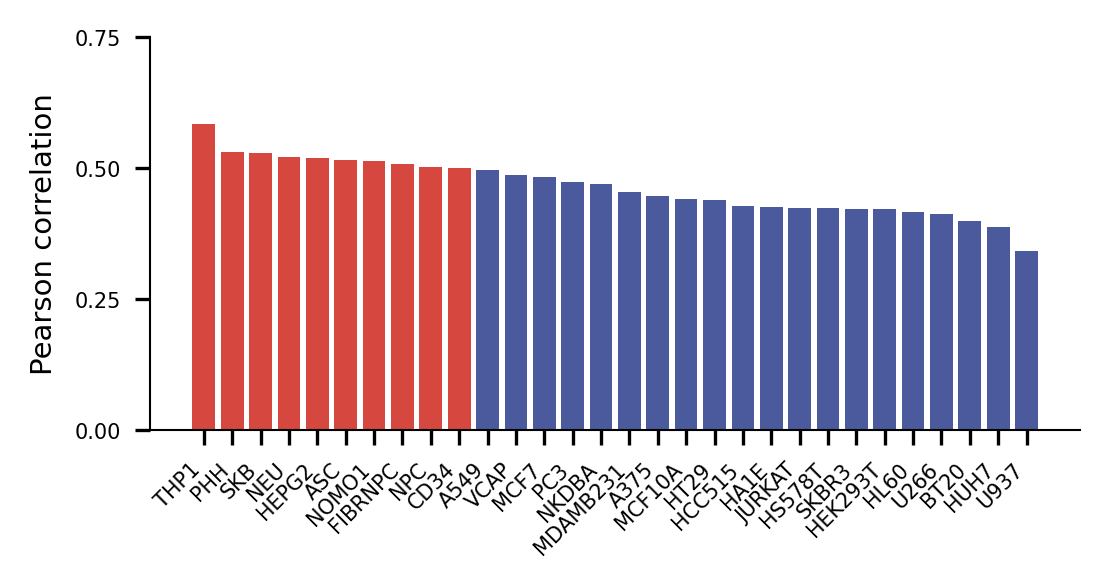

In [35]:
inset_data = ccl_res

# Define colors based on PCC values
colors = ["#D2352C"] * np.sum(inset_data["PCC"] > 0.5) + ["#394A92"] * np.sum(inset_data["PCC"] <= 0.5)

# Set bar width
width = 0.8

# Initialize the plot
fig, ax = plt.subplots(figsize=(4.0, 1.7))

# Plot the bar chart for PCC values of cell lines (CCL)
ax.bar(inset_data["CCL"], inset_data["PCC"], width=width, align='edge', color=colors, alpha=0.91)

# Set the y-axis label
ax.set_ylabel('Pearson correlation', fontsize=7)

# Configure x-axis ticks and labels
x = np.arange(inset_data.shape[0])  
ax.set_xticks(x + width / 2)
ax.set_xticklabels(list(inset_data["CCL"]), rotation=45, fontsize=5, horizontalalignment='right')

# Configure y-axis ticks and labels
ax.set_yticks(np.arange(0.0, 0.8, 0.25))
ax.set_yticklabels(['0.00', '0.25', '0.50', '0.75'], fontsize=5)

# Hide the top and right spines for better aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the plot
plt.show()
